## Testing properties of the method

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy
from src import utils
import copy
import pickle

In [2]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

### Load and process data

In [3]:
def load_experiments(filename):
    f = open(filename, "rb")
    results = pickle.load(f)
    return results[0], results[1::]

def merge_runs(old, new, min_merge=False):
    if len(old) == len(new) or (len(old) < len(new) and min_merge):
        for i in range(len(old)):
            old[i] += new[i].copy()
    else:
        raise Exception("Cannot merge")
    return old

In [4]:
def load_results(filenames):
    print("Loading %s" % filenames[0])
    cases, results = load_experiments(filenames[0])
    for filename in filenames[1::]:
        print("Loading %s" % filename)
        new_cases, new_results = load_experiments(filename)
        cases += new_cases
        for k in range(len(results)):
            results[k] = merge_runs(results[k], new_results[k])
    print("\nLoaded a total of %d graphs with %d runs each" % (len(results[0][0]), len(results[0])))
    return cases, results

In [5]:
def hamming_distance(A,B,p):
    a = np.zeros(p)
    b = np.zeros(p)
    a[list(A)] = 1
    b[list(B)] = 1
    return scipy.spatial.distance.hamming(a, b)

In [9]:
def generate_trajectories(results, cases):
    runs = len(results[0])
    N = len(results[0][0])
    P = len(results)

    no_ints = np.zeros((len(results), runs, N))
    all_trajectories_ham = {}
    all_lens_accepted = {}
    all_lens_selection = {}
    all_type1_errors = {}
    names = []
    for k, policy_runs in enumerate(results):
        name = policy_runs[0][0].policy
        print("Processing results for %s policy" % name, end="")
        names.append(name)
        trajectories_ham = []
        lens_accepted = []
        lens_selection = []
        type1_errors = []
        for i,run_results in enumerate(policy_runs):
            no_ints[k, i,:] = list(map(lambda result: len(result.interventions()), run_results))
            for j, result in enumerate(run_results):
                estimates = list(map(lambda step: step[0], result.history[0::])) + [result.estimate]
                trajectory_ham = list(map(lambda estimate: hamming_distance(cases[j].truth, estimate, cases[j].sem.p), estimates))
                type1_error = list(map(lambda estimate: set.issubset(estimate, cases[j].truth), estimates))
                trajectories_ham.append(trajectory_ham)
                lens_accepted.append(list(map(lambda step: step[3], result.history)))
                lens_selection.append(list(map(lambda step: step[2], result.history)))
                type1_errors.append(type1_error)
        all_trajectories_ham[name] = trajectories_ham
        all_lens_accepted[name] = lens_accepted
        all_lens_selection[name] = lens_selection
        all_type1_errors[name] = type1_errors
        print(" done")
    return all_trajectories_ham, all_type1_errors, all_lens_accepted, all_lens_selection, N, P, runs, names, no_ints

In [10]:
experiments_p8_50iter = [
["experiments/results_1586450713_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:10_alpha:0.0002_tag:apr9sp_sp:False.pickle"],
["experiments/results_1586444456_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:10_alpha:0.0002_tag:apr9sp_sp:True.pickle"],
["experiments/results_1586451585_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:10_alpha:0.002_tag:apr9sp_sp:False.pickle"],
["experiments/results_1586447722_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:10_alpha:0.002_tag:apr9sp_sp:True.pickle"],
["experiments/results_1586454230_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:100_alpha:0.0002_tag:apr9sp_sp:False.pickle"],
["experiments/results_1586445199_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:100_alpha:0.0002_tag:apr9sp_sp:True.pickle"],
["experiments/results_1586453445_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:100_alpha:0.002_tag:apr9sp_sp:False.pickle"],
["experiments/results_1586445070_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:100_alpha:0.002_tag:apr9sp_sp:True.pickle"],
["experiments/results_1586458798_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:apr9sp_sp:False.pickle"],
["experiments/results_1586446471_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:apr9sp_sp:True.pickle"],
["experiments/results_1586454231_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:1000_alpha:0.002_tag:apr9sp_sp:False.pickle"],
["experiments/results_1586445712_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:50_n:1000_alpha:0.002_tag:apr9sp_sp:True.pickle"],
["experiments/results_1586453884_k:3.0_G:100_runs:16_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:5_alpha:0.002_tag:apr9ls_sp:True.pickle"]
]

experiments_p8 = [
    ["experiments/results_1586537317_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.0001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586536815_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586541911_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586536218_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586536308_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.0001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586534711_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586537710_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586534741_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586544861_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.0001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586536764_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586564355_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586534484_k:3.0_G:100_runs:8_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.001_tag:apr10_sp:True.pickle"]
]

experiments_p12 = [
    ["experiments/results_1586640065_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.0001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586662081_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586626062_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586647723_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586639238_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.0001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586555917_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586650769_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.001_tag:apr10_sp:False.pickle"],
    ["experiments/results_1586563751_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:100_alpha:0.001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586743466_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586743466_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.0001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586628176_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.001_tag:apr10_sp:True.pickle"],
    ["experiments/results_1586628176_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:1000_alpha:0.001_tag:apr10_sp:True.pickle"]
]

In [52]:
# Experiments to load

experiments = experiments_p12

Trajectories = []
LensAccepted = []
LensSelection = []
NoInts = []
Type1Errors = []

for i,filenames in enumerate(experiments):
    print("\n\n %d/%d" % (i, len(experiments)), end=" ")
    cases, results = load_results(filenames)
    trajectories, type1errors, lens_accepted, lens_selection, N, P, runs, names, no_ints = generate_trajectories(results, cases)
    if i==0:
        prev_N, prev_P, prev_runs = N, P, runs
    elif prev_N != N or prev_P != P or prev_runs != runs:
        print(N, P, runs)
        print(prev_N, prev_P, prev_runs)
        raise Exception("Experiments have different number of graphs / policies / runs")
    Trajectories.append(trajectories)
    LensAccepted.append(lens_accepted)
    LensSelection.append(lens_selection)
    NoInts.append(no_ints)
    Type1Errors.append(type1errors)




 0/12 Loading experiments/results_1586640065_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.0001_tag:apr10_sp:False.pickle

Loaded a total of 100 graphs with 8 runs each
Processing results for random policy done
Processing results for e policy done
Processing results for e soft policy done
Processing results for r policy done
Processing results for e + r policy done
Processing results for markov policy done
Processing results for markov + e policy done
Processing results for markov + r policy done
Processing results for markov + e + r policy done


 1/12 Loading experiments/results_1586662081_k:3.0_G:100_runs:8_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_i_mean:10_i_var:1_random_state:1_finite:True_max_iter:100_n:10_alpha:0.0001_tag:apr10_sp:True.pickle

Loaded a total of 100 graphs with 8 runs each
Processing resul

### Change in accepted sets vs. iterations

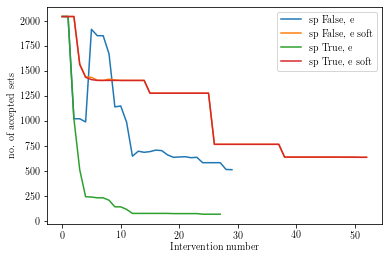

In [42]:
i = 0
plt.plot(LensAccepted[0]["e"][i], label="sp False, e")
plt.plot(LensAccepted[0]["e soft"][i], label="sp False, e soft")
plt.plot(LensAccepted[1]["e"][i], label="sp True, e")
plt.plot(LensAccepted[1]["e soft"][i], label="sp True, e soft")
plt.xlabel("Intervention number")
plt.ylabel("no. of accepted sets")
plt.legend()

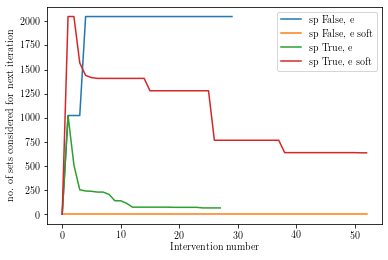

In [43]:
plt.plot(LensSelection[0]["e"][i], label="sp False, e")
plt.plot(LensSelection[0]["e soft"][i], label="sp False, e soft")
plt.plot(LensSelection[1]["e"][i], label="sp True, e")
plt.plot(LensSelection[1]["e soft"][i], label="sp True, e soft")
plt.xlabel("Intervention number")
plt.ylabel("no. of sets considered for next iteration")
plt.legend()

#### Set max. number of iterations to plot (eg. plot true positive recovery for the first 50 interventions)

In [15]:
max_iter = 100

**Summary of graphs used**

100 graphs in total


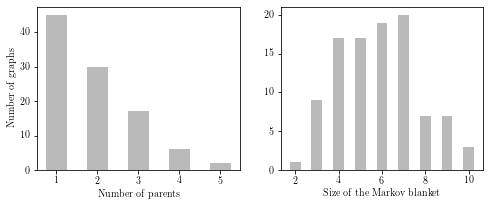

In [16]:
n_parents = np.zeros(N)
n_vars = np.zeros(N)
size_mb = np.zeros(N)
for i, case in enumerate(cases):
    n_parents[i] = len(case.truth)
    n_vars[i] = case.sem.p
    mb = utils.graph_info(case.target, case.sem.W)[3]
    size_mb[i] = len(mb)

def plot_hist(data, title):
    bins = np.arange(data.min(), data.max()+2)-0.5
    hist = plt.hist(data, bins, rwidth=0.5, align='mid', color="#BABABA")#colorsb[2])
    plt.xlabel(title)
    
plt.figure(figsize=(8,3))
#plt.subplot(131), plot_hist(n_vars, "Number of variables")
plt.subplot(121), plot_hist(n_parents, "Number of parents"), plt.ylabel("Number of graphs")
plt.subplot(122), plot_hist(size_mb, "Size of the Markov blanket")
print("%d graphs in total" % N)

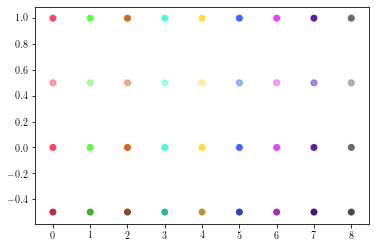

In [18]:
# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#d2691e",]#np.array([cmap(i) for i in range(2,20)])
base = [base[i] for i in [0,2,8,3,1,4,5,6,7]]
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

In [19]:
# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

### Plots B: Number of interventions required

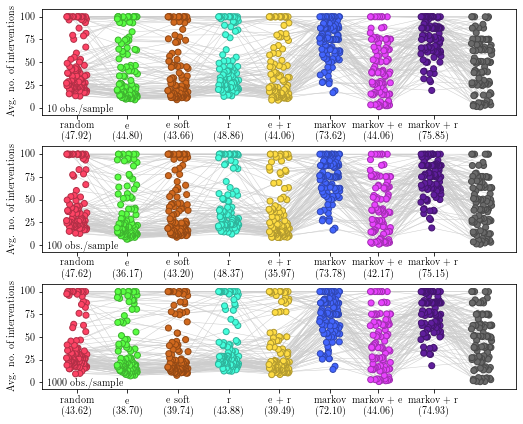

In [20]:
gs = gridspec.GridSpec(3, 1, wspace=0.10, hspace=0.3)
plt.figure(figsize=(8.5,7))

NoIntsAux = copy.deepcopy(NoInts)
for no_ints in NoIntsAux:
    no_ints[no_ints > max_iter] = max_iter

##############################
# n=10
plt.subplot(gs[0])
means = np.mean(NoIntsAux[0][:,:,:], axis=1)

dev = 0.2
xaxis = np.tile(np.arange(P), (N, 1)) - np.outer(np.linspace(-dev, dev, N), np.ones(P))
ecolor = "#cdcdcd"
for i in range(N):
    plt.plot(xaxis[i,:], means[:, i].T, color=ecolor, zorder=0, linewidth=0.5)
for i in range(N):
    plt.scatter(xaxis[i,:], means[:, i].T, marker="o", c=colors[0:P], zorder=1, edgecolors=colorsb)
plt.ylabel("Avg. no. of interventions")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,5.95,7.05])
total_averages = means.mean(axis=1)
labels = []
for i, avg in enumerate(total_averages):
    labels.append(names[i] + "\n(%0.2f)" % avg)
ax.set_xticklabels(labels, ha="center", rotation=0)
ax.text(0.01,0.027,"10 obs./sample", transform=ax.transAxes, fontsize=10, ha="left")

##############################
# n=100
plt.subplot(gs[1])
means = np.mean(NoIntsAux[1][:,:,:], axis=1)

dev = 0.2
xaxis = np.tile(np.arange(P), (N, 1)) - np.outer(np.linspace(-dev, dev, N), np.ones(P))
ecolor = "#cdcdcd"
for i in range(N):
    plt.plot(xaxis[i,:], means[:, i].T, color=ecolor, zorder=0, linewidth=0.5)
for i in range(N):
    plt.scatter(xaxis[i,:], means[:, i].T, marker="o", c=colors[0:P], zorder=1, edgecolors=colorsb)
plt.ylabel("Avg. no. of interventions")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,5.95,7.05])
total_averages = means.mean(axis=1)
labels = []
for i, avg in enumerate(total_averages):
    labels.append(names[i] + "\n(%0.2f)" % avg)
ax.set_xticklabels(labels, ha="center", rotation=0)
ax.text(0.01,0.027,"100 obs./sample", transform=ax.transAxes, fontsize=10, ha="left")

##############################
# n=1000
plt.subplot(gs[2])
means = np.mean(NoIntsAux[2][:,:,:], axis=1)

dev = 0.2
xaxis = np.tile(np.arange(P), (N, 1)) - np.outer(np.linspace(-dev, dev, N), np.ones(P))
ecolor = "#cdcdcd"
for i in range(N):
    plt.plot(xaxis[i,:], means[:, i].T, color=ecolor, zorder=0, linewidth=0.5)
for i in range(N):
    plt.scatter(xaxis[i,:], means[:, i].T, marker="o", c=colors[0:P], zorder=1, edgecolors=colorsb)
plt.ylabel("Avg. no. of interventions")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,5.95,7.05])
total_averages = means.mean(axis=1)
labels = []
for i, avg in enumerate(total_averages):
    labels.append(names[i] + "\n(%0.2f)" % avg)
ax.set_xticklabels(labels, ha="center", rotation=0)
ax.text(0.01,0.027,"1000 obs./sample", transform=ax.transAxes, fontsize=10, ha="left")

plt.savefig('figures/intervention_numbers_finite.pdf', bbox_inches='tight')

### Plot D: Sensitivity analysis

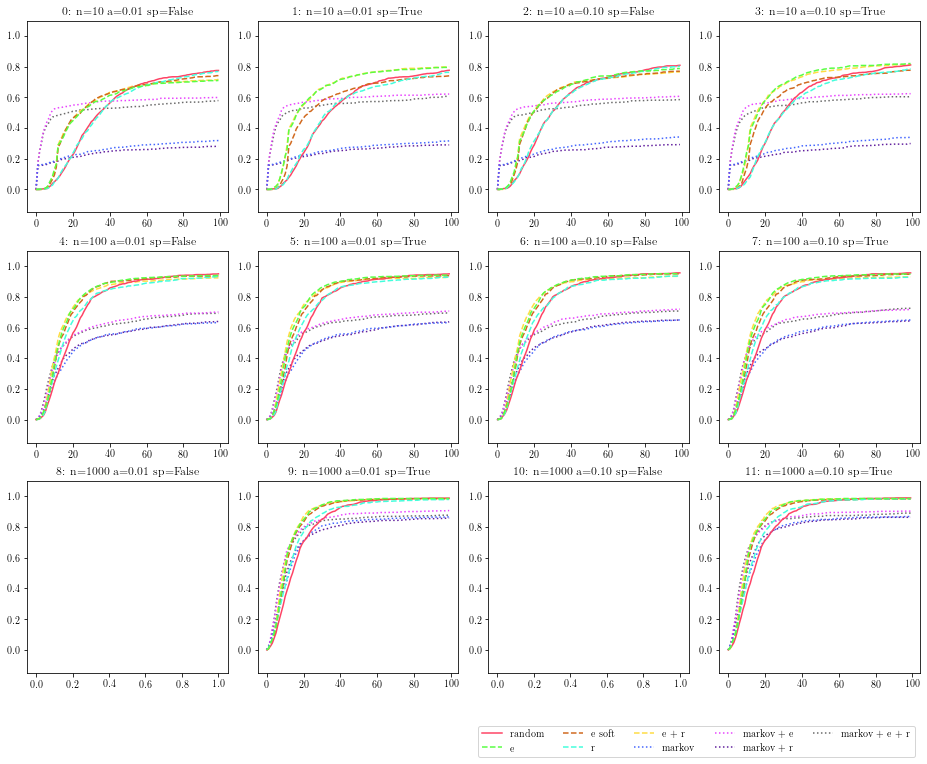

In [53]:
# Plot settings
gs = gridspec.GridSpec(3, 4, wspace=0.15, hspace=0.2)
plt.figure(figsize=(16,12))

plot_iter = 100
x_axis = np.arange(0, plot_iter)
ylim = [-0.15, 1.1]
linestyle = ['-', '--', '--', '--', '--', ':', ':', ':', ':']
zorder = [1,4,2,3,-1,-2,-3,-4,-5]
levels = [0.01, 0.1]

levels = [0.01, 0.1]
ns = [10,100,1000]
sp = [False, True]

# Plot
for i, all_trajectories in enumerate(Trajectories[0:12]):
    print("Plotting %d/%d" % (i+1, len(Trajectories)), end="\r")
    hm_dist = np.zeros((P, N*runs, max_iter+1))
    for j, policy_trajectories in enumerate(all_trajectories.values()):
        for k, trajectory in enumerate(policy_trajectories):
            n = min(plot_iter, len(trajectory))
            hm_dist[j, k, 0:n] = trajectory[0:n]
    mean = np.mean(hm_dist == 0, axis=1)
    plt.subplot(gs[i])
    ax = plt.gca()
    # Plot TPR for each policy
    if i in [8,10]:
        ax.plot([],[])
    else:
        for j,name in enumerate(all_trajectories.keys()):
            ax.plot(x_axis, mean[j,x_axis], label=name, linewidth=1.5, linestyle = linestyle[j], color=colors[j], zorder=zorder[j])    
    
    plt.title("%d: n=%d a=%0.2f sp=%s" % (i, ns[int(np.floor(i/4))], levels[int(np.floor(i/2)) % 2], sp[i % 2]))
    #ax.set_yticklabels([]) if i % 4 != 0 else None
    plt.ylim(ylim)

ax.legend(prop=fontP, ncol=5, bbox_to_anchor=(1, -.25))
plt.savefig('figures/comparison_p12.pdf', bbox_inches='tight')

### Plot E: Type-1 error rate

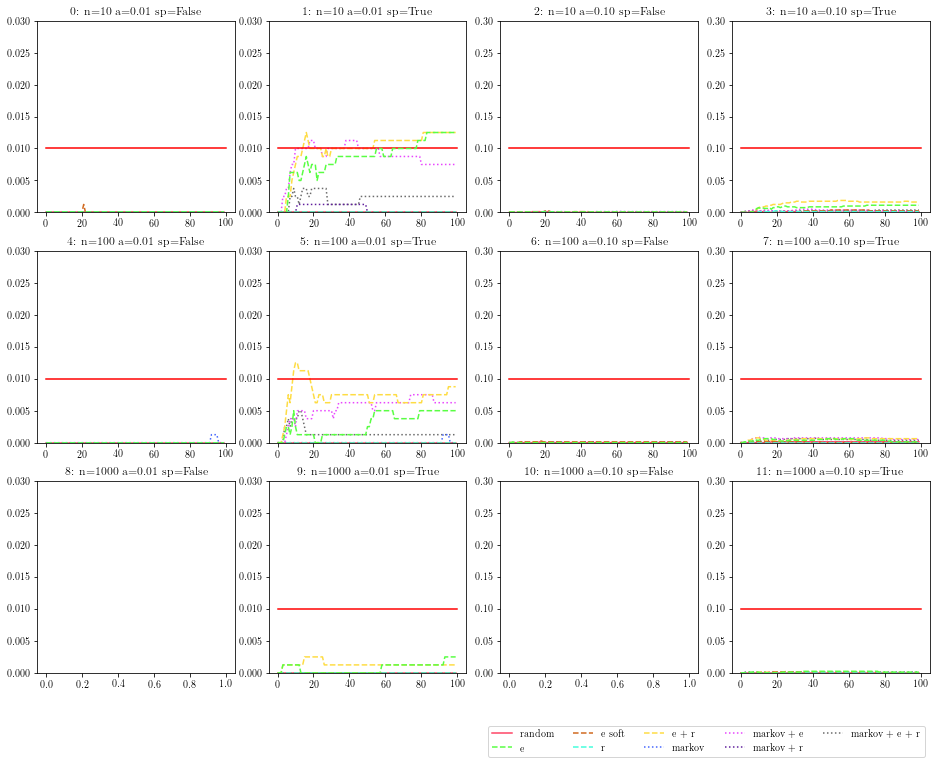

In [54]:
# Plot settings
gs = gridspec.GridSpec(3, 4, wspace=0.17, hspace=0.2)
plt.figure(figsize=(16,12))

plot_iter = 100
x_axis = np.arange(0, plot_iter)
linestyle = ['-', '--', '--', '--', '--', ':', ':', ':', ':']
zorder = [1,4,2,3,-1,-2,-3,-4,-5]
levels = [0.01, 0.1]

levels = [0.01, 0.1]
ns = [10,100,1000]
sp = [False, True]

# Plot
for i, all_type1_errors in enumerate(Type1Errors[0:12]):
    print("Plotting %d/%d" % (i+1, len(Trajectories)), end="\r")
    errors = np.ones((P, N*runs, max_iter+1))
    for j, policy_errors in enumerate(all_type1_errors.values()):
        for k, error_trajectory in enumerate(policy_errors):
            n = min(plot_iter, len(error_trajectory))
            errors[j, k, 0:n] = error_trajectory[0:n]
    mean = np.mean(1 - errors, axis=1)
    plt.subplot(gs[i])
    ax = plt.gca()
    level = levels[int(np.floor(i/2)) % 2]
    # Plot FPR for each policy
    if i in [8,10]:
        ax.plot([],[])
    else:
        #ax.set_yticklabels([]) if i % 2 == 1 else None
        plt.plot([0,plot_iter], [level, level], color="red")
        for j,name in enumerate(all_trajectories.keys()):
            ax.plot(x_axis, mean[j,x_axis], label=name, linewidth=1.5, linestyle = linestyle[j], color=colors[j], zorder=zorder[j])    
    plt.title("%d: n=%d a=%0.2f sp=%s" % (i, ns[int(np.floor(i/4))], level, sp[i % 2]))
    plt.ylim([0, 3 * level])

ax.legend(prop=fontP, ncol=5, bbox_to_anchor=(1, -.25))
plt.savefig('figures/type1error_p12.pdf', bbox_inches='tight')